<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


#1.0 Analisis del data frame

1. Leer el data framen housing csv https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv




2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```

3. Determinar las columnas únicas asociadas a columna ocean_proximity.



4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value","ocean_proximity"]
```

5. Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


6. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

In [2]:
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(path)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
#Primera vision de los datos
print("INFO")
df.info()
print("IS NA")
df.isna().sum()

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
IS NA


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
ocean_proximity_unique = df["ocean_proximity"].unique()
print(ocean_proximity_unique)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [5]:
df.groupby(["ocean_proximity"]).mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


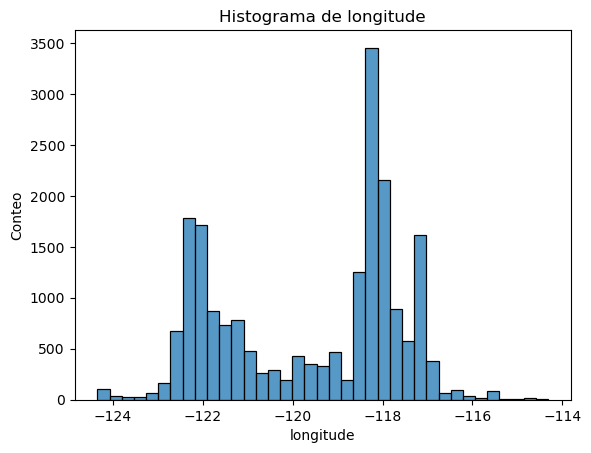

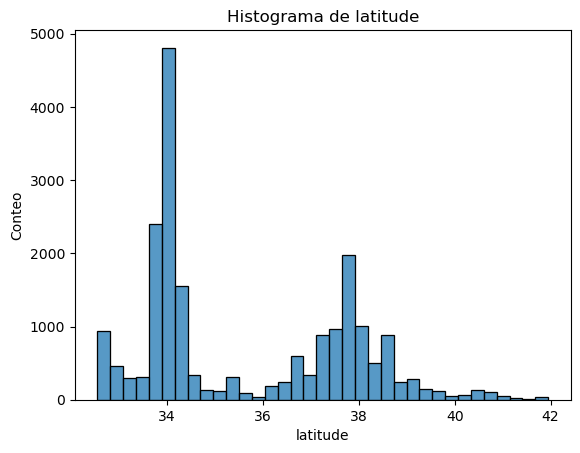

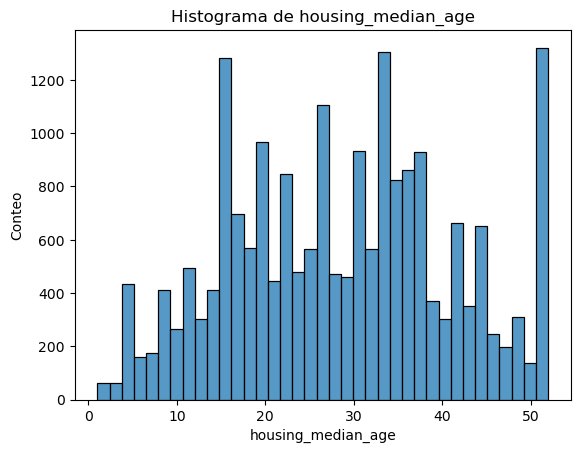

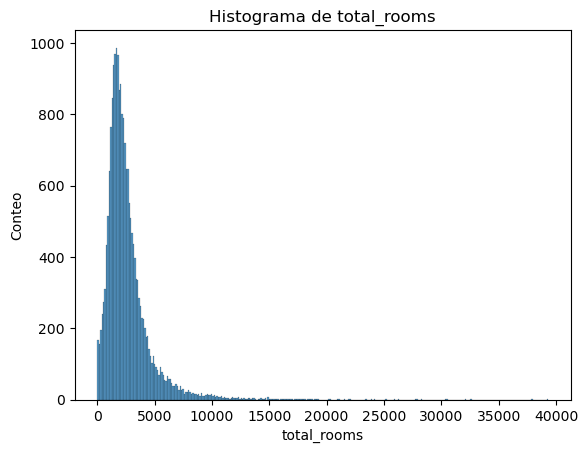

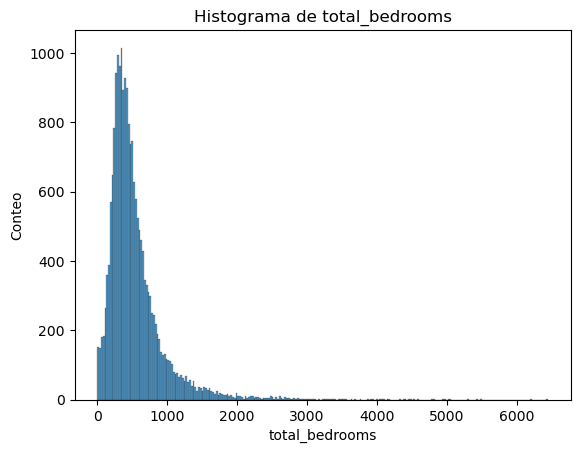

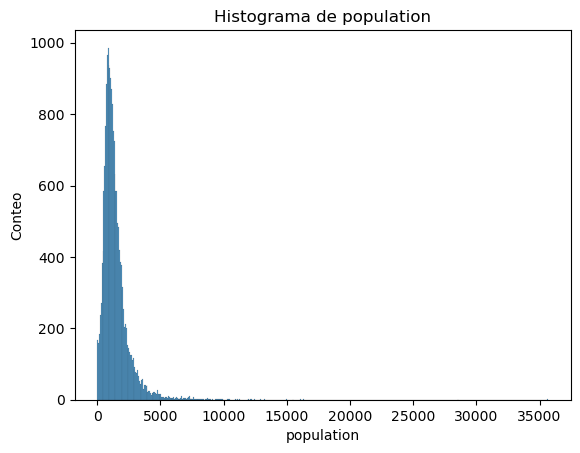

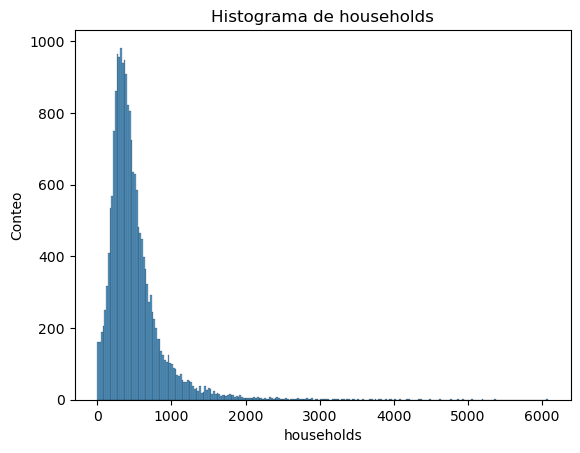

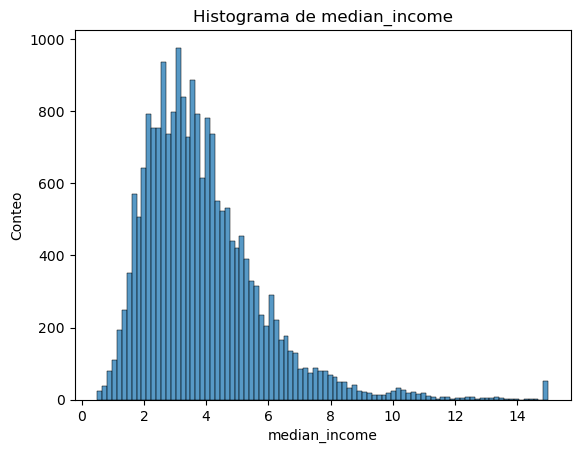

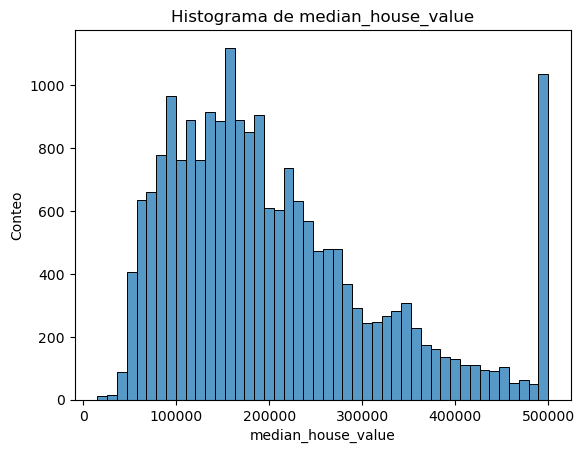

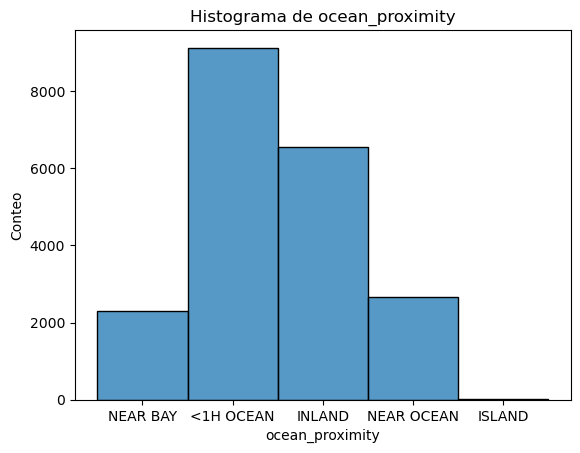

In [6]:
for column in df.columns:
    sns.histplot(df[column])  # Crear el histograma 
    plt.title(f'Histograma de {column}')  # Título con el nombre de la columna
    plt.xlabel(column)  # Etiqueta del eje X
    plt.ylabel('Conteo')  # Etiqueta del eje Y
    plt.show()  # Mostrar el gráfico

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

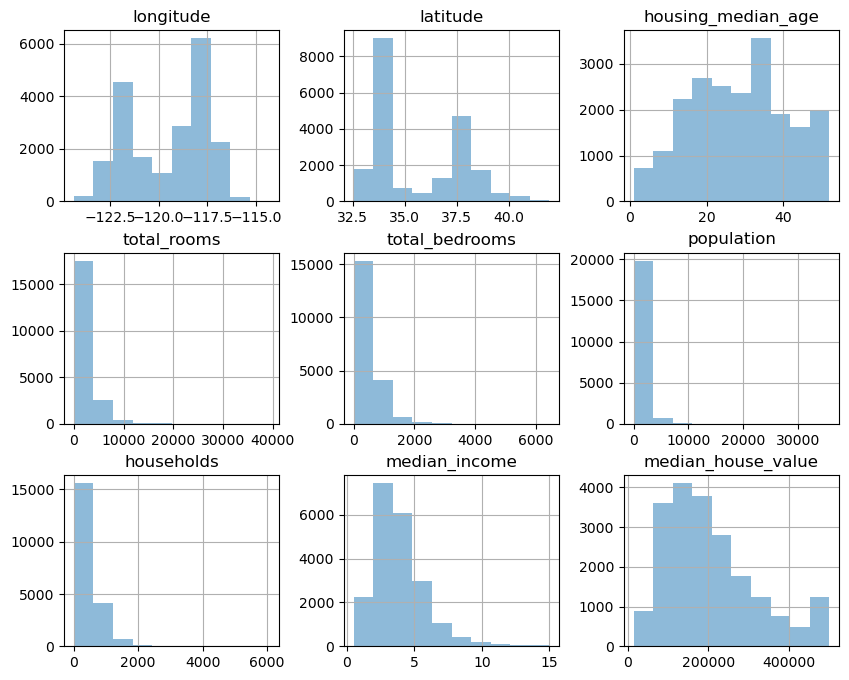

In [7]:
#En un solo diagrama
df.hist(alpha=0.5, figsize=(10,8))

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [8]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

In [9]:
#Contar las posiciones
N = len(T)
pos_q = [ a*(N+1)/4 for a in [1,2,3]]
print(pos_q)

[6.25, 12.5, 18.75]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       24 non-null     int64
dtypes: int64(1)
memory usage: 324.0 bytes


<Axes: >

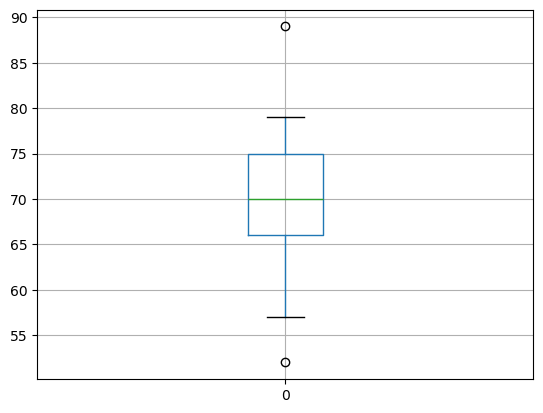

In [10]:
df_T = pd.DataFrame(T)
df_T.info()
df_T.describe()
df_T.boxplot()

88.5
52.5


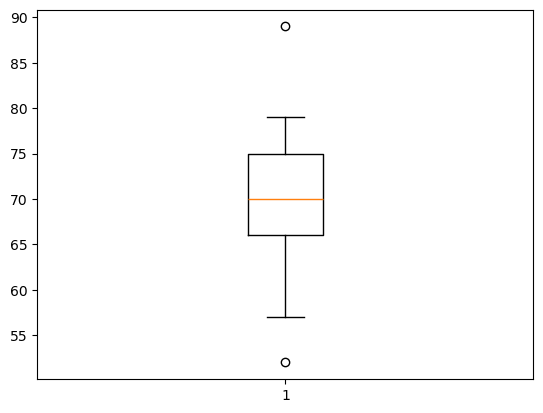

In [11]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)
plt.show()



7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for Comparing price per living space for each city')
plt.show()
```

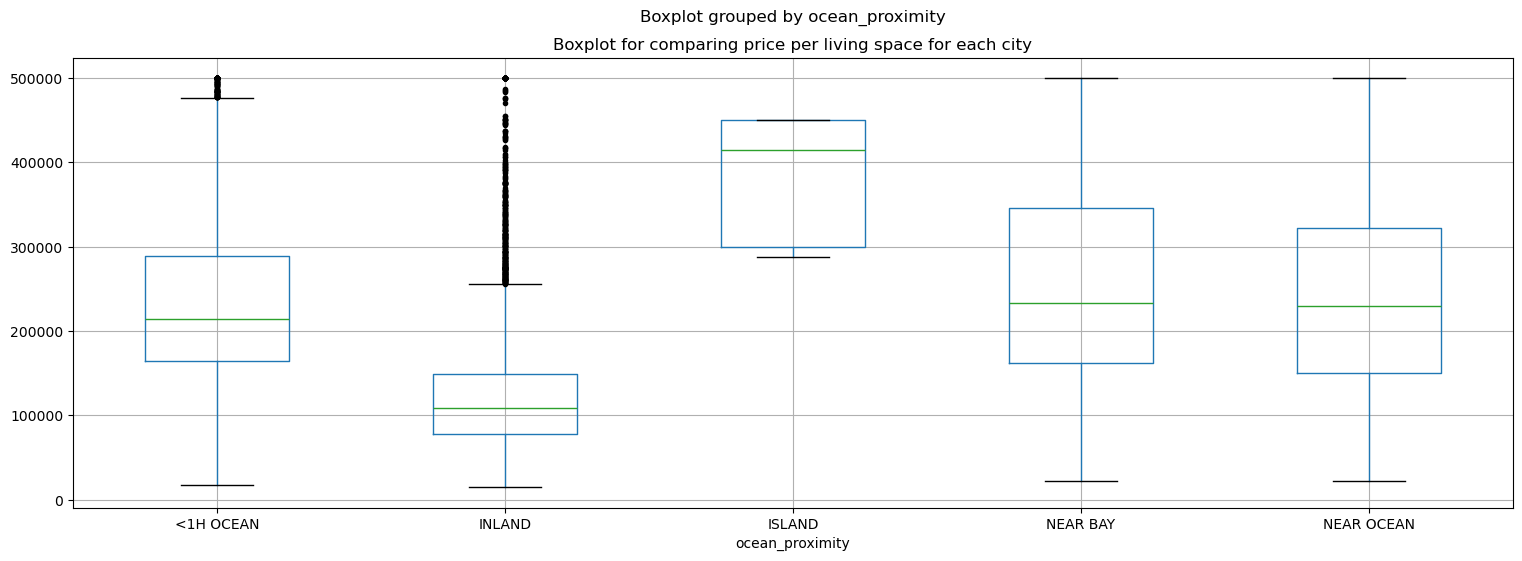

In [12]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()
```

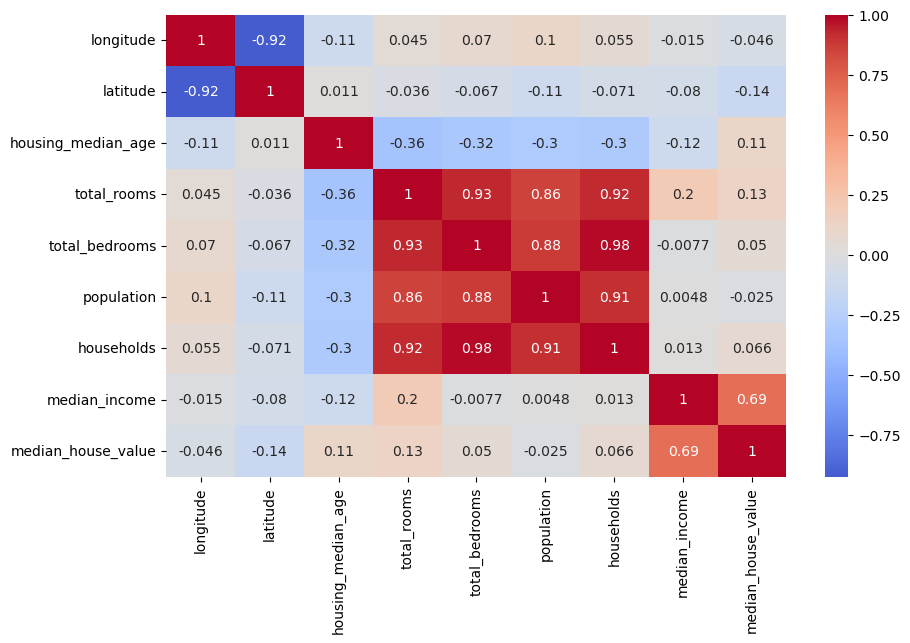

In [13]:
#Practicar la diferencia en cmap default con cmap coolwarm. El segundo permite
#visualizar mejor los extremos positivos y negativos.
numerical_df = df.select_dtypes(include=['float', 'int'])

corr_matrix = numerical_df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

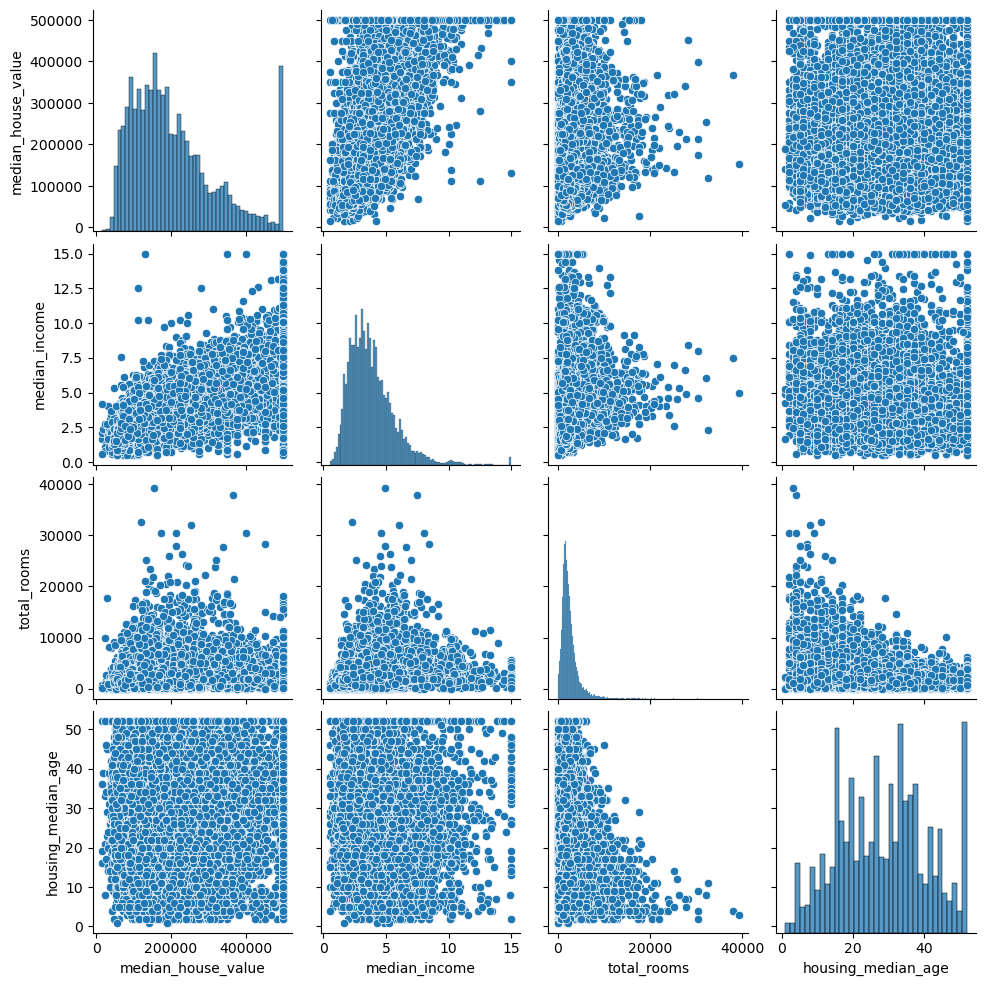

In [14]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
df_reduced = df[cols]
sns.pairplot(df_reduced)

<Axes: xlabel='housing_median_age', ylabel='total_rooms'>

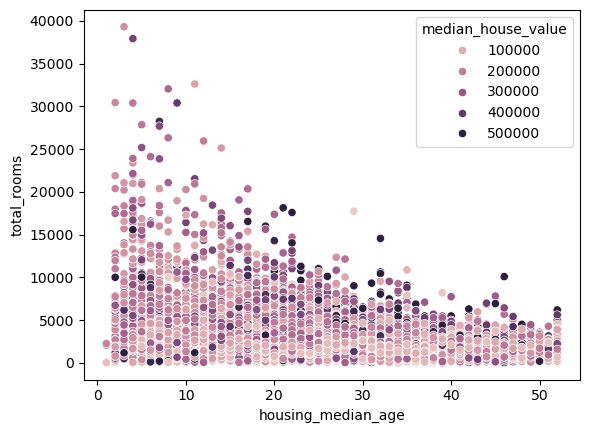

In [15]:
sns.scatterplot(df,x="housing_median_age",y="total_rooms",hue="median_house_value", )

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






In [16]:


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
     

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)
     

print(len(train_set))
print(len(test_set))
     


16512
4128


<Axes: >

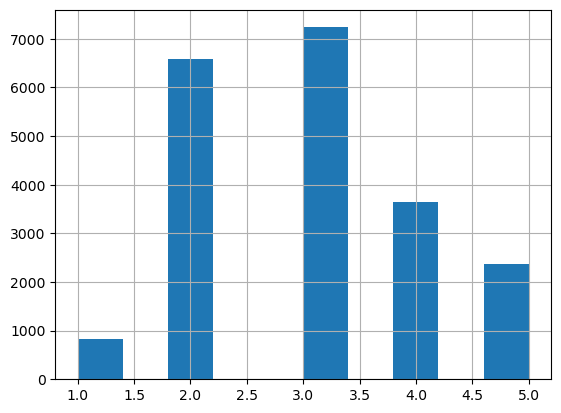

In [17]:
#Division en grupos


df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
     

df.income_cat.hist()
     


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


In [19]:
df["income_cat"].value_counts() / len(df)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [20]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [22]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

In [23]:
test_set["income_cat"].value_counts() / len(test_set)

income_cat
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: count, dtype: float64

In [24]:
test_set["income_cat"].value_counts() / len(test_set)

income_cat
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: count, dtype: float64

In [25]:


def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
     

compare_props
     


,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


In [31]:
#En conclusion


#Si no recuerda los comandos de pandas, puede ver una cheat sheet 
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
data_link = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(data_link)

#1. Leer los data. 
#2. Para hacer el split analizar si la muestra es significativa para el entrenamiento y test
#3. Dejar los data de test ocultos para hacer las pruebas
     

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
     

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

df_train = strat_train_set
df_test = strat_test_set
     



In [33]:
#MAtriz de correlacion
numerical_df_train = df_train.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

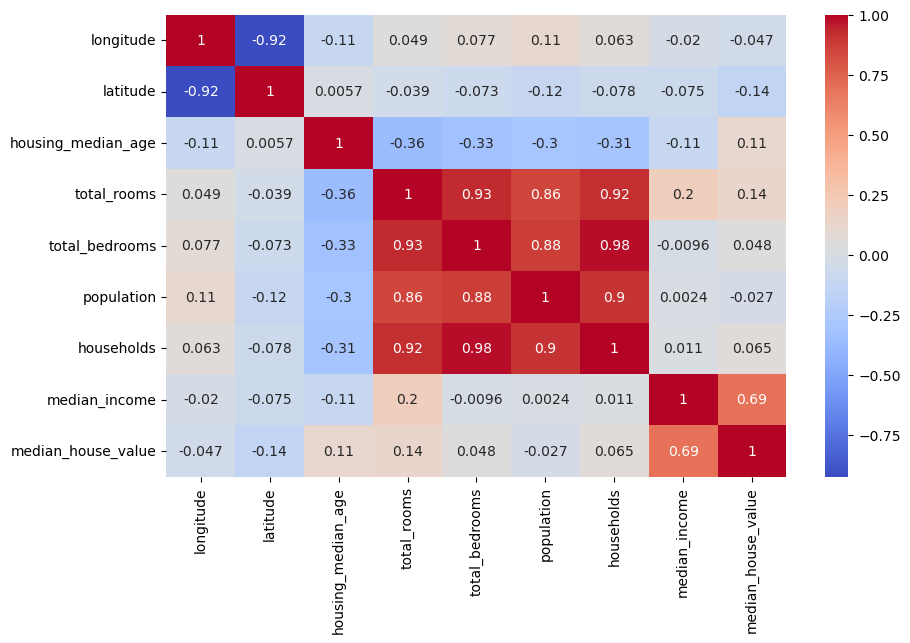

In [34]:
# Visualización de la matrix de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")
plt.show()

In [36]:
#Agregar nuevas variables
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]


In [42]:
numerical_df_train = df_train.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [43]:
corr_matrix = numerical_df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

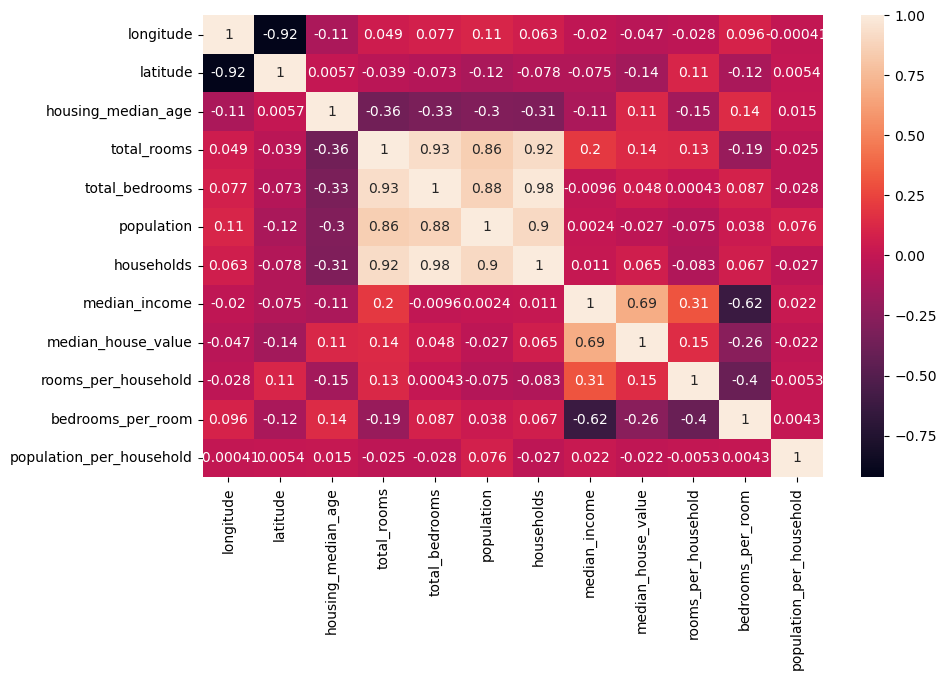

In [44]:
# Visualización de la matrix de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [45]:
#Limpieza de datos
df_train.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [47]:
#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()

In [48]:
q=pd.DataFrame(q)

In [49]:
q.isnull().sum()

total_bedrooms    0
dtype: int64

In [57]:
#Imputer

#df_train_num = df_train.drop("ocean_proximity", axis=1)
df_train_num = df_train.select_dtypes(include=['float', 'int'])    

from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")
imp_mean = SimpleImputer( strategy='mean')
     

imp_mean.fit(df_train_num)
     



imp_mean.statistics_
     


array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.34914639e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        2.07005322e+05,  5.44040595e+00,  2.12872772e-01,  3.09646921e+00])

In [58]:

df_train_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [59]:

X = imp_mean.transform(df_train_num)

In [60]:
X

array([[-121.46      ,   38.52      ,   29.        , ...,    5.48583569,
           0.20578363,    3.16855524],
       [-117.23      ,   33.09      ,    7.        , ...,    6.92708333,
           0.16071429,    2.62369792],
       [-119.04      ,   35.37      ,   44.        , ...,    5.39333333,
           0.19159456,    2.22333333],
       ...,
       [-122.72      ,   38.44      ,   48.        , ...,    4.11046512,
           0.23479491,    2.6627907 ],
       [-122.7       ,   38.31      ,   14.        , ...,    6.29740519,
           0.18383518,    2.41117764],
       [-122.14      ,   39.97      ,   27.        , ...,    5.47715736,
           0.20574606,    3.17258883]])

In [61]:

housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

In [62]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,6.297405,0.183835,2.411178


In [63]:
#Manejo texto y atributos categoricos


#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
     

df_train["ocean_proximity"].unique()
     



array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [64]:
housing_cat=df_train[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [66]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [67]:


# Read Data
data_link = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(data_link)
     

# 1. Clasification 
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df_ = df.copy()


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_, df_["income_cat"]):
 strat_train_set = df_.loc[train_index]
 strat_test_set = df_.loc[test_index]

     

for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)
     

strat_train_set
     


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [68]:
# 2 Add New variables to data
housing = strat_train_set.copy()
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [69]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [70]:


housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

     

housing.isnull().sum()
     


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [71]:

housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,0.183835,2.411178


In [72]:
# Imputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(housing_num)
imp_mean.statistics_

array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.34914639e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        5.44040595e+00,  2.12872772e-01,  3.09646921e+00])

In [73]:
X = imp_mean.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)


In [74]:

housing_tr.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [76]:
# 3. One hot encoder
housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)
     

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [77]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [78]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [81]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot)

In [82]:
housing_tr_ = housing_tr.join(df_cat_1hot)

In [83]:
#Escalamiento de variables


cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]
     

housing_scale=housing_tr_[cols]
     

housing_scale
     


KeyError: "['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] not in index"

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

NameError: name 'housing_scale' is not defined

In [85]:
X = scaler.transform(housing_scale)
X

NameError: name 'housing_scale' is not defined

In [86]:


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)
     


NameError: name 'housing_scale' is not defined

In [87]:


# Consideremos las siguientes columnas: 
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income"]
housing_prep = housing_prepared[cols]
     

housing_prep
     


NameError: name 'housing_prepared' is not defined

In [88]:


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_prep, housing_labels)
housing_predictions = model.predict(housing_prep)
     

model.score(housing_prep, housing_labels)
     


NameError: name 'housing_prep' is not defined

In [ ]:
#¿Como autmatizar todo el proceso?
#¿El modelo de regresion lineal es valido para lo construido, 
#que informacion nos da el score?
#¿Se puede mejorar agregando nuevas caracteristicas?
# ¿Puede ser ajustado a otro modelo?

In [93]:
#sklearn pipeline example 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Sample DataFrame
data = {
    'age': [25, np.nan, 30, 45, np.nan],
    'income': [50000, 60000, np.nan, 80000, 120000],
    'gender': ['male', 'female', 'female', np.nan, 'male'],
    'city': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Chicago']
}
df = pd.DataFrame(data)

# Identify the columns to apply each transformation
numeric_features = ['age', 'income']
categorical_features = ['gender', 'city']

# Define the transformations for each column type
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a ColumnTransformer that applies the transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
cleaned_data = pipeline.fit_transform(df)


# Get feature names for each transformer
cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(cat_columns)

# Convert the result back to a DataFrame for easier viewing
cleaned_df = pd.DataFrame(cleaned_data, columns=all_columns)

cleaned_df

,age,income,gender_female,gender_male,gender_nan,city_Chicago,city_Los Angeles,city_New York
0,25.000000,50000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.333333,60000.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.000000,77500.0,1.0,0.0,0.0,0.0,0.0,1.0
3,45.000000,80000.0,0.0,0.0,1.0,1.0,0.0,0.0
4,33.333333,120000.0,0.0,1.0,0.0,1.0,0.0,0.0


In [96]:
#Including a regression fit 

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample DataFrame
data = {
    'age': [25, np.nan, 30, 45, np.nan],
    'income': [50000, 60000, np.nan, 80000, 120000],
    'gender': ['male', 'female', 'female', np.nan, 'male'],
    'city': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Chicago'],
    'house_price': [300000, 400000, 500000, 600000, 700000]
}
df = pd.DataFrame(data)

# Identify the columns to apply each transformation
numeric_features = ['age', 'income']
categorical_features = ['gender', 'city']
target = 'house_price'

# Split data into features and target
X = df.drop(columns=[target])
y = df[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformations for each column type
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a ColumnTransformer that applies the transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with preprocessing and regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate mean squared error for the regression model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 194663640.83410037
